#**TextOCR**
* DaNang,15/07/2022 5:24 PM
* By LeoGino
* Contact: leo18gino@gmail.com
* Dataset:

In [ ]:
!pip install easyocr -q

In [ ]:
import easyocr
import pandas as pd

reader = easyocr.Reader(['en'],gpu=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


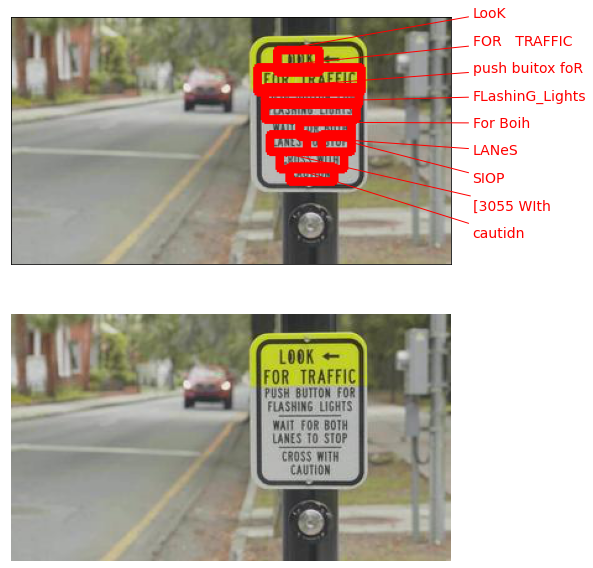

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import numpy as np

img = '/content/drive/MyDrive/Extract text from image/TrafficSign.jpg'
result = reader.readtext(img)

df = []
img_id = img.split('/')[-1].split('.')[0]
img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
img_df
img_df['img_id'] = img_id
df.append(img_df)
easyocr_df = pd.concat(df)

fig, ax = plt.subplots(2,1,figsize=(15,10))
easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
easy_results = [(x[0], np.array(x[1])) for x in easy_results]
keras_ocr.tools.drawAnnotations(plt.imread(img), easy_results,ax[0])

ax[1].imshow(plt.imread(img))
ax[1].axis('off')

plt.show()